# Momento de Retroalimentación: Reto Limpieza del Conjunto de Datos

Ruben Sánchez Mayen

Octavio Andrick Sánchez Perusquía 

Luis Ignacio Ferro Salinas 

Mariana Erandi del Angel Hernández

Alejandro Domínguez Lugo

## Importación de librerías y datos

Librerías

In [1]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme()

Importar Datos

In [2]:
!pip install -q kaggle

In [3]:
# Cargar API Kaggle
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"guichofe19","key":"707cf934f5f3dfd029a79a2842ac5424"}'}

In [4]:
# Crear dirección para el API de Kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

# Cambiar a ejecutable
!chmod 600 ~/.kaggle/kaggle.json

# Confirmar conexión a Kaggle
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           5850        191  1.0              
kaggleashwin/population-dataset                                World Population by Countries Dataset (1960-2021)    69KB  2022-08-31 05:30:26           1625         70  1.0              
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03          11929        305  1.0              
pantanjali/unemployment-dataset                                Un

In [5]:
# Descargar dataset
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 47.7MB/s]


In [6]:
# Abrir zip
!unzip spaceship-titanic.zip -d "/content/kaggledb"

Archive:  spaceship-titanic.zip
  inflating: /content/kaggledb/sample_submission.csv  
  inflating: /content/kaggledb/test.csv  
  inflating: /content/kaggledb/train.csv  


In [7]:
# Cargar datos
df=pd.read_csv("/content/kaggledb/train.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [8]:
# Confirmar dimensiones dataset
df.shape

(8693, 14)

## Limpieza de datos con herramientas de ETL

Para la limpieza de datos se realizarán los siguientes pasos:

1. Corrección de duplicados
2. Corrección de *outliers*
3. Corrección de valores faltantes

### Corrección de datos duplicados

Se eliminarán los datos duplicados para evitar que estos sesguen la información y así tener registros únicos que aporten información valiosa

In [9]:
# Crear nuevo dataframe para limpieza
dfCl = df.copy()

# Comprobar copia adecuada
dfCl.shape

(8693, 14)

In [10]:
# Identificar datos duplicados
dfCl.duplicated().sum()

0

Dado que no se identificaron registros duplicados no hay más limpieza que hacer en este sentido.

### Corrección de *outliers*

Se eliminarán los *outliers* que correspondan a registros atípicos que sesguen la información y que afecten negativamente los posibles modelos de predicción que se puedan generar.

Para identificar los *outliers* primero se generarán histogramas de los datos numéricos

In [11]:
# Identificar datos numéricos
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [12]:
# Separar datos numéricos
numeric = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
dfNum = dfCl[numeric]

# Confirmar
dfNum.dtypes

Age             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


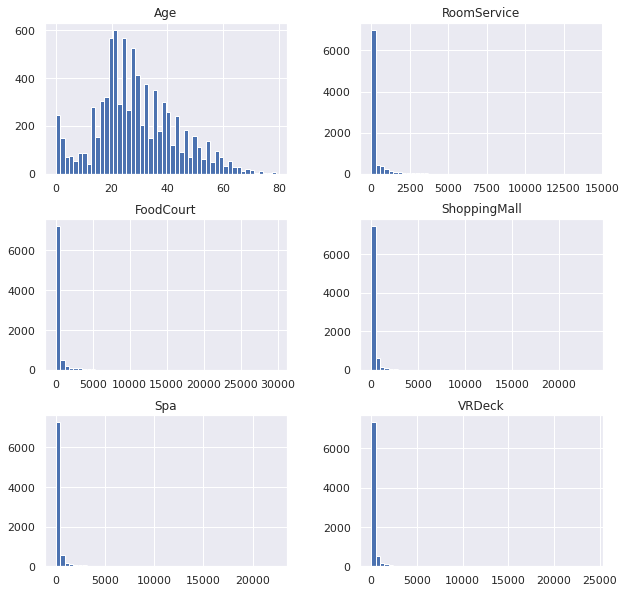

In [13]:
# Mostrar valores numéricos en histogramas
fig, ax = plt.subplots(figsize=(10,10))
dfNum.hist(ax = ax, bins = 50)
plt.show()

Los datos también se presentarán como boxplots para poder ayudar a identificar los *outliers*.

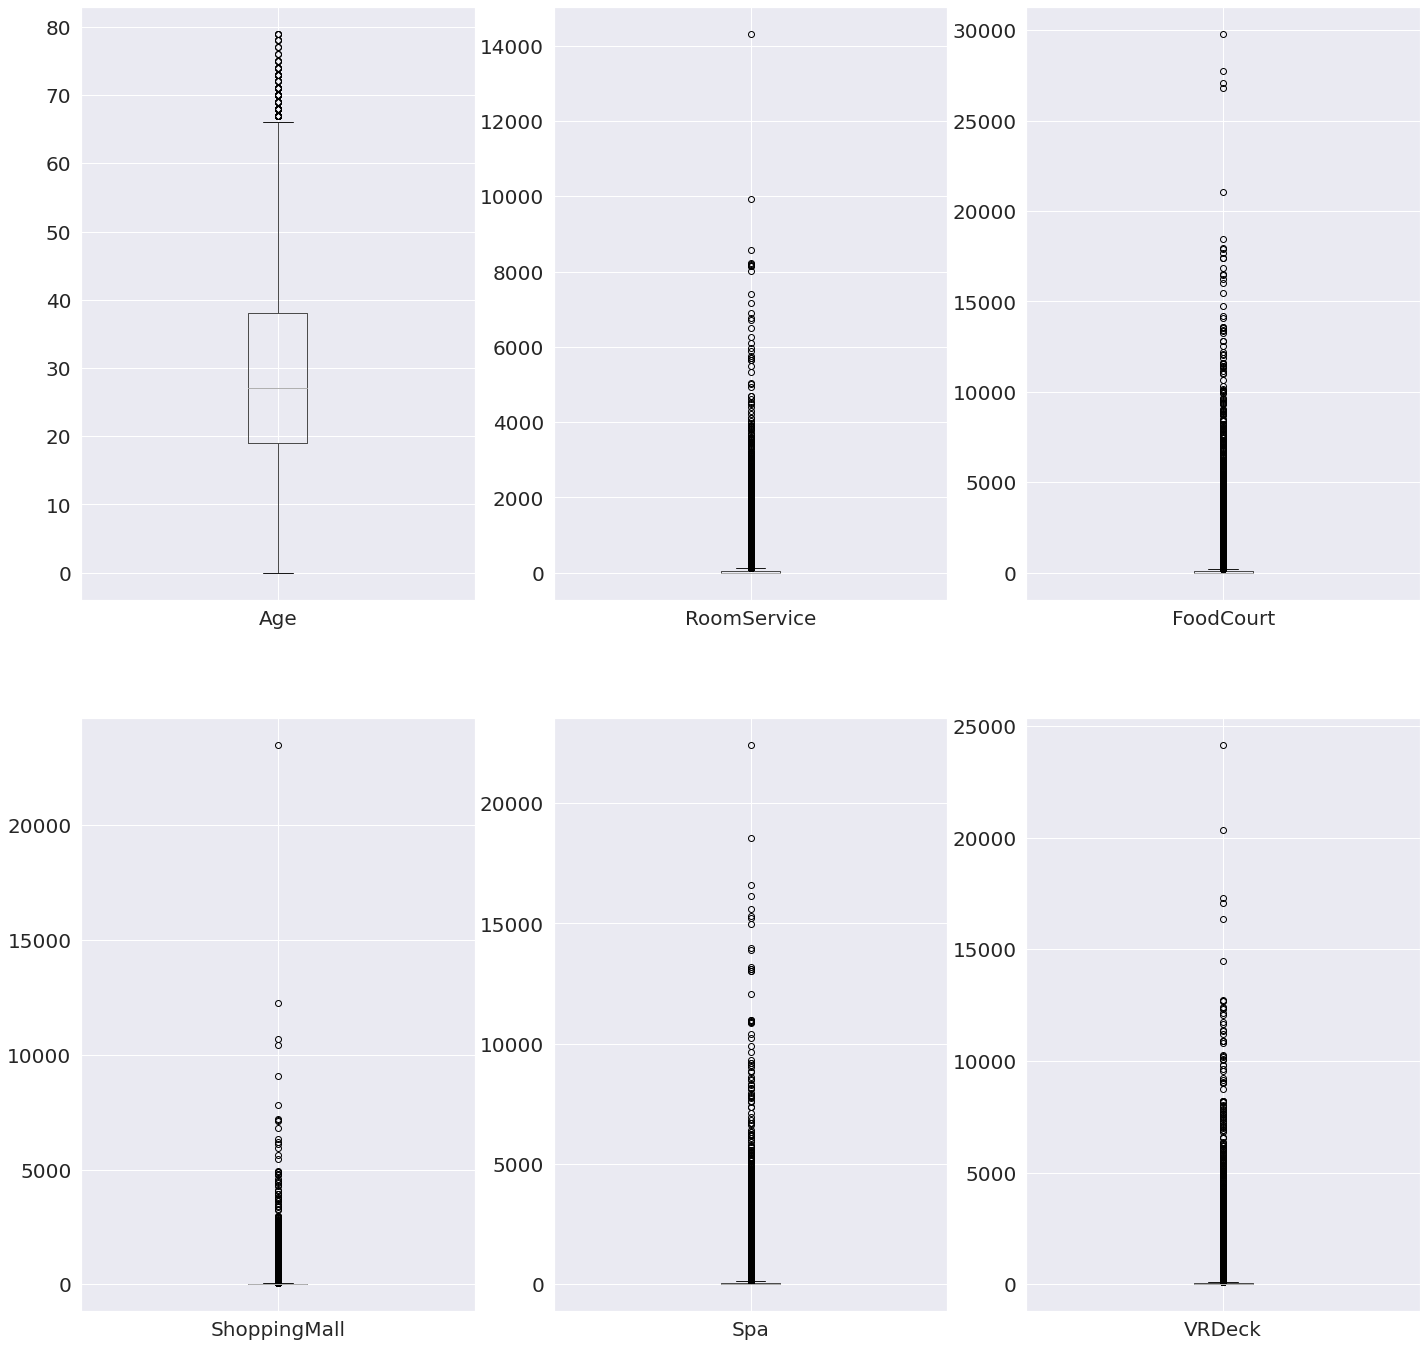

In [14]:
# Generar subplots
fig, ax = plt.subplots(2,3, figsize = (24, 24))
for i, elem in enumerate(list(dfNum.columns.values)):
    dfNum.boxplot(elem, ax = ax.flatten()[i], fontsize = 20)

# Mostrar
plt.show()

Como se puede observar, todas las distribuiciones menos *Age* tienen *outliers* que hay que eliminar. Lo anterior debido a que la proporción de outliers detectada (>1.5IQR) no es significativa. Pese a esto, es importante notar que estas mismas distribuiciones se ven afectadas ya que la gran mayoría de datos son 0. Esto resulta en que se tomen como *outliers* valores que son parte de la distribuición y que aportan información valiosa.

Por esta razón, se eliminarán los *outliers* con límites establecidos directamente con lo observado. 

La sugerencia de límites es la siguiente:

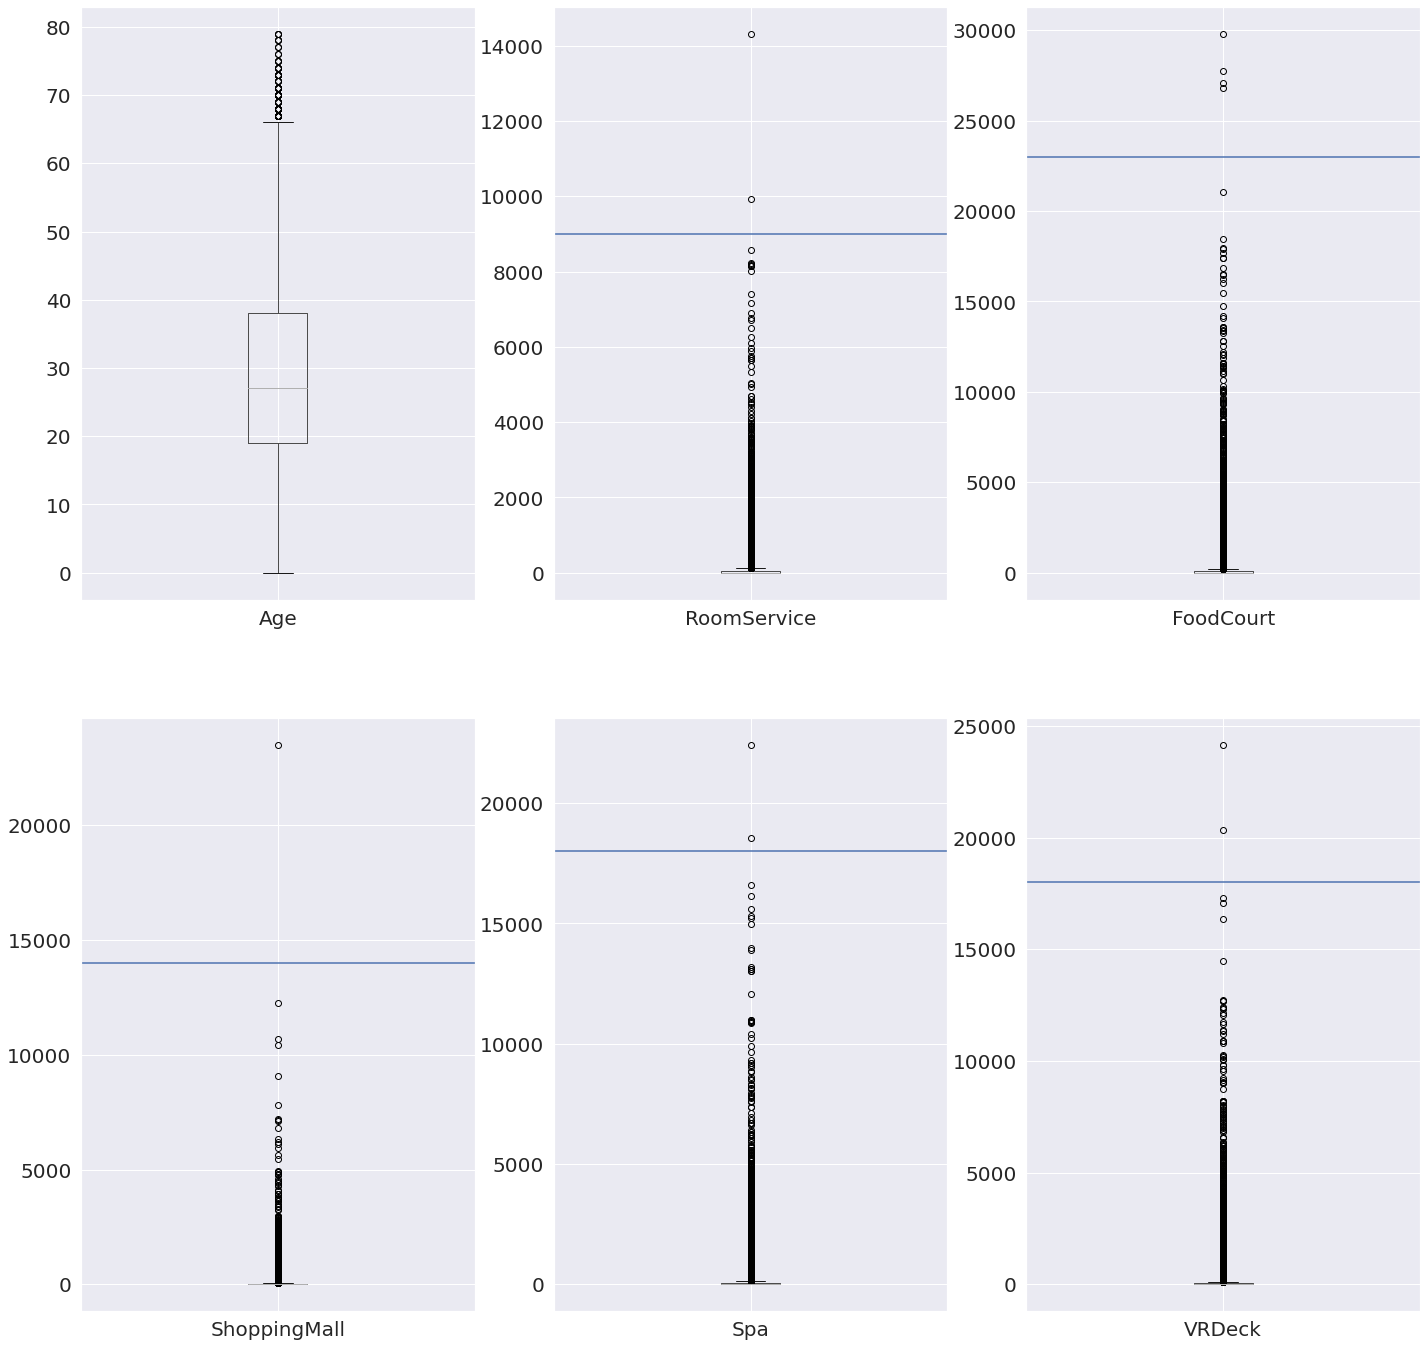

In [15]:
# Establecer límites
limits = [np.nan, 9000, 23000, 14000, 18000, 18000]

# Generar subplots con límites
fig, ax = plt.subplots(2,3, figsize = (24, 24))

n = 0
m = 1

for i, elem in enumerate(list(dfNum.columns.values)):
    dfNum.boxplot(elem, ax = ax.flatten()[i], fontsize = 20)
    if i > 0:
      ax[n, m].axhline(y = limits[i])
      m += 1
      if m > 2:
        m = 0
        n += 1
    
# Mostrar
plt.show()

Es importante reconocer que estos valores, al ser elegidos por nosotros, son lo suficientemente flexibles para eliminar los datos que consideramos como *outliers* que afectan negativamente al modelo, pero están sujetos a nuestra opinión de lo que afecta o no negativamente. Intuitivamente, dichos valores se localizan en los extremos con una desviación considerable en comparación de las distancias típicas entre las demás observaciones, pero dicho análisis fue meramente visual.

En esta situación es la mejor opción y nos quedaremos con esta aproximación, pero puede ser un punto donde se generen errores más adelante en el análisis.

In [16]:
# Preparar condiciones
column = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
limits = limits[1:]

# Eliminar valores más allá de los límites
for i in range(5):
  dfCl.drop(dfCl[df[column[i]]>limits[i]].index, inplace = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


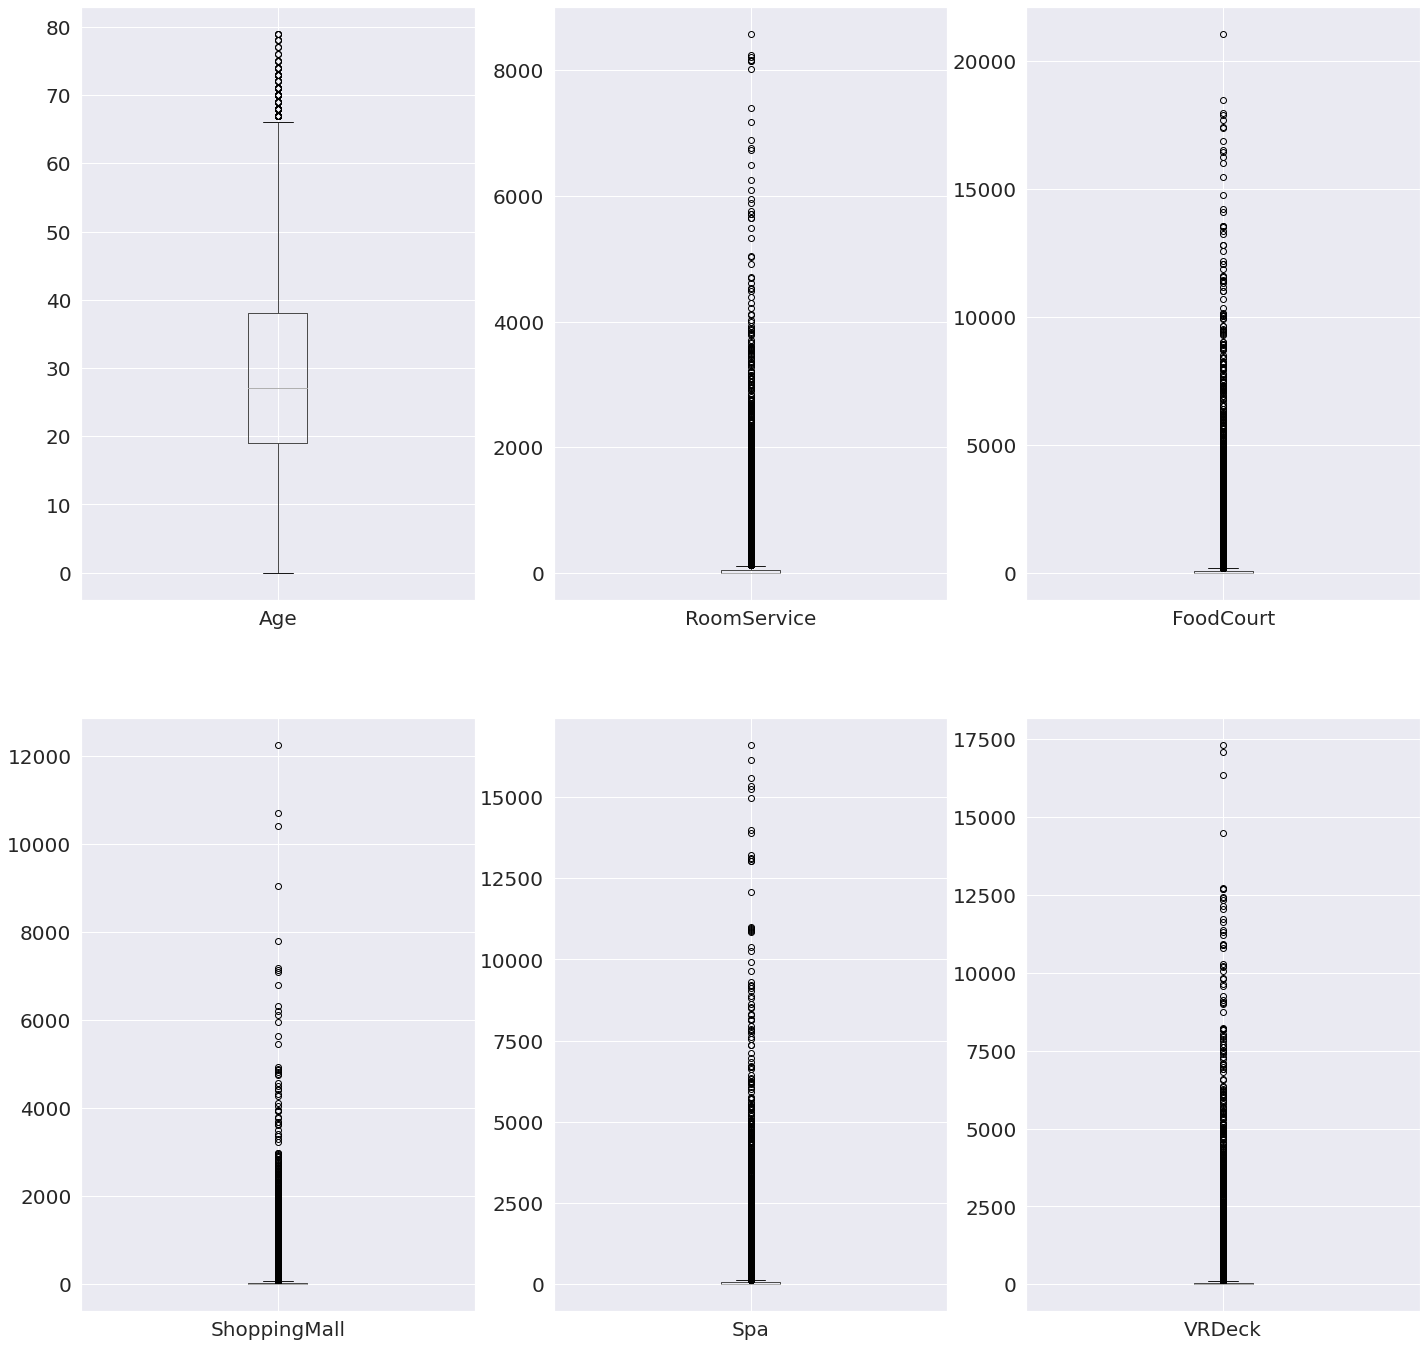

In [17]:
# Separar datos numéricos
numeric = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
dfNum = dfCl[numeric]

# Generar nuevos subplots
fig, ax = plt.subplots(2,3, figsize = (24, 24))
for i, elem in enumerate(list(dfNum.columns.values)):
    dfNum.boxplot(elem, ax = ax.flatten()[i], fontsize = 20)

# Mostrar
plt.show()

Con esto se han corregido los *outliers* que afectaban negativamente los datos.

### Corrección de datos faltantes

Primero hay que identificar los datos faltantes.

In [18]:
# Cálculo de porcentaje de valores faltantes
dfCl.isna().sum()/dfCl.shape[0] * 100

PassengerId     0.000000
HomePlanet      2.315135
CryoSleep       2.499424
Cabin           2.280581
Destination     2.096291
Age             2.061737
VIP             2.338171
RoomService     2.084773
FoodCourt       2.107809
ShoppingMall    2.395761
Spa             2.096291
VRDeck          2.165400
Name            2.280581
Transported     0.000000
dtype: float64

El porcentaje de valores faltantes es reducido en todas las variables. Podríamos quitar algunos renglones para eliminar los valores faltantes, no obstante, si eliminaramos la mayoría, los porcentajes se acumularían y terminaríamos perdiendo una cantidad importante de información, es por eso que decidímos **imputar la media en el caso de las variables numéricas.**

In [19]:
# Datos númericos = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

# Cálculo de la media de las variables numéricas
ageMean = dfNum['Age'].mean()
roomServiceMean = dfNum['RoomService'].mean()
foodCourtMean = dfNum['FoodCourt'].mean()
shoppingMallMean = dfNum['ShoppingMall'].mean()
spaMean = dfNum['Spa'].mean()
VRDeckMean = dfNum['VRDeck'].mean()

# Imputación por sustitución de medias
dfNum['Age'].fillna(value = ageMean, inplace = True)
dfNum['RoomService'].fillna(value = roomServiceMean, inplace = True)
dfNum['FoodCourt'].fillna(value = foodCourtMean, inplace = True)
dfNum['ShoppingMall'].fillna(value = shoppingMallMean, inplace = True)
dfNum['Spa'].fillna(value = spaMean, inplace = True)
dfNum['VRDeck'].fillna(value = VRDeckMean, inplace = True)

# Cálculo de porcentaje de valores faltantes
#dfNum.isna().sum()/dfNum.shape[0] * 100


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Extendiendo el razonamiento anterior, también imputaremos los valores faltantes en las variables categóricas que consideremos que sean útiles, pero en este caso utilizaremos la moda o el valor más común.

In [20]:

categorical_cols = ["PassengerId", "HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name"]
df_categorical = dfCl[categorical_cols]


Consideramos que los atributos de PassengerId y Name no deberían de tener  impacto sobre el resultado ya que son prácticamente únicas para cada distinto pasajero, entonces las eliminamos.

In [21]:
df_categorical.drop(["PassengerId", "Name"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8682 entries, 0 to 8692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HomePlanet   8481 non-null   object
 1   CryoSleep    8465 non-null   object
 2   Cabin        8484 non-null   object
 3   Destination  8500 non-null   object
 4   VIP          8479 non-null   object
dtypes: object(5)
memory usage: 407.0+ KB


In [23]:
for column in df_categorical:
    df_categorical[column].fillna(df_categorical[column].mode()[0], inplace=True)

In [24]:
df_categorical.isna().sum()

HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
dtype: int64

In [25]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8682 entries, 0 to 8692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HomePlanet   8682 non-null   object
 1   CryoSleep    8682 non-null   bool  
 2   Cabin        8682 non-null   object
 3   Destination  8682 non-null   object
 4   VIP          8682 non-null   bool  
dtypes: bool(2), object(3)
memory usage: 288.3+ KB


Y ya tenemos 0 datos faltantes en las columnas categóricas de nuestro dataframe

In [26]:
df_categorical

,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,Europa,False,B/0/P,TRAPPIST-1e,False
1,Earth,False,F/0/S,TRAPPIST-1e,False
2,Europa,False,A/0/S,TRAPPIST-1e,True
3,Europa,False,A/0/S,TRAPPIST-1e,False
4,Earth,False,F/1/S,TRAPPIST-1e,False
...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,True
8689,Earth,True,G/1499/S,PSO J318.5-22,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,False
8691,Europa,False,E/608/S,55 Cancri e,False


Una vez que quedaron limpias las variables numéricas y categóricas, se juntan en un mismo dataframe

In [27]:
print('Tamaño del dataframe con las variables numéricas limpias: ', dfNum.shape)
print('Tamaño del dataframe con las variables numéricas limpias: ', df_categorical.shape)
print()
print('Comparación de los índices de cada dataframe: ', (dfNum.index == df_categorical.index).sum())


Tamaño del dataframe con las variables numéricas limpias:  (8682, 6)
Tamaño del dataframe con las variables numéricas limpias:  (8682, 5)

Comparación de los índices de cada dataframe:  8682


In [28]:
# Índice del dataframe limpio sin variable nombre
index = df_categorical.index

# Unir el dataframe
df_junto = pd.DataFrame()

# Agregar variables en orden
df_junto['PassengerId'] = df.loc[index]['PassengerId']
df_junto['HomePlanet'] = df_categorical['HomePlanet'] 
df_junto['CryoSleep'] = df_categorical['CryoSleep']
df_junto['Cabin'] = df_categorical['Cabin']
df_junto['Destination'] = df_categorical['Destination']
df_junto['Age'] = dfNum['Age']
df_junto['VIP'] = df_categorical['VIP']
df_junto['RoomService'] = dfNum['RoomService']
df_junto['FoodCourt'] = dfNum['FoodCourt']
df_junto['ShoppingMall'] = dfNum['ShoppingMall']
df_junto['Spa'] = dfNum['Spa']
df_junto['VRDeck'] = dfNum['VRDeck']
df_junto['Transported'] = df.loc[index]['Transported']

In [29]:
clean_df = df_junto.copy()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8682 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8682 non-null   object 
 1   HomePlanet    8682 non-null   object 
 2   CryoSleep     8682 non-null   bool   
 3   Cabin         8682 non-null   object 
 4   Destination   8682 non-null   object 
 5   Age           8682 non-null   float64
 6   VIP           8682 non-null   bool   
 7   RoomService   8682 non-null   float64
 8   FoodCourt     8682 non-null   float64
 9   ShoppingMall  8682 non-null   float64
 10  Spa           8682 non-null   float64
 11  VRDeck        8682 non-null   float64
 12  Transported   8682 non-null   bool   
dtypes: bool(3), float64(6), object(4)
memory usage: 771.5+ KB


# Etapa de Transformación

In [30]:
clean_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


En esta etapa se procesarán las columnas con variables categóricas para que puedan ser más amigables al pasar a la etapa de modelación

In [31]:
print(clean_df['HomePlanet'].unique())
print(clean_df['CryoSleep'].unique())
print(clean_df['Destination'].unique())
print(clean_df['VIP'].unique())
print(clean_df['Transported'].unique())

['Europa' 'Earth' 'Mars']
[False  True]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
[False  True]
[False  True]


Como se puede observar es conveniente crear una columna por cada valor de las columnas de 'HomePlanet' y 'Destination'
Y transformar los valores True/False a valores numéricos 1/0

In [32]:
# Crear dummie variables de 'HomePLanet' y 'Destination'
clean_df = pd.concat([clean_df, pd.get_dummies(clean_df['HomePlanet']).rename(columns=lambda x: 'HomePlanet_' + str(x))], axis=1)
clean_df['Destination'] = clean_df['Destination'].replace({'PSO J318.5-22': 'PSOJ318.5-22', '55 Cancri e': '55Cancrie'})
clean_df = pd.concat([clean_df, pd.get_dummies(clean_df['Destination']).rename(columns=lambda x: 'Destination_' + str(x))], axis=1)
clean_df.drop(columns=['HomePlanet', 'Destination'], inplace=True )

# Reemplazar valores categóricos True/False a numéricos 1/0
clean_df['CryoSleep'] = clean_df['CryoSleep'].replace({True: 1, False: 0})
clean_df['VIP'] = clean_df['VIP'].replace({True: 1, False: 0})
clean_df['Transported'] = clean_df['Transported'].replace({True: 1, False: 0})

# Crear una columna 'Group' según 'PassengerId'
clean_df['Group'] = 0
for i in index:
  clean_df['Group'].loc[i] = int(clean_df['PassengerId'].loc[i][:4])

# Crear una columna 'NumGroup' según 'PassengerId'
clean_df['NumGroup'] = 0
for i in index:
  clean_df['NumGroup'].loc[i] = int(clean_df['PassengerId'].loc[i][-2:])

# Crear una columna para saber si la persona iba sola o no
clean_df['Alone'] = clean_df['Group'].duplicated(keep=False)
for i in index:
  cantidad = clean_df['Alone'].loc[i]
  if cantidad == False:
    clean_df['Alone'].loc[i] = 1
  else:
    clean_df['Alone'].loc[i] = 0

# Creación de nueva columna 'Deck' según 'Cabin'
clean_df['Deck'] = 0
for i in index:
  clean_df['Deck'].loc[i] = clean_df['Cabin'].loc[i][:1]
clean_df['Deck'] = clean_df['Deck'].replace({'A': 1, 'B': 1, 'C': 2, 'D': 2, 'E': 3, 'F': 3, 'G': 4, 'T': 4})

# Creación de nueva columna 'Num' según 'Cabin'
clean_df['Num'] = 0
for i in index:
  clean_df['Num'].loc[i] = clean_df['Cabin'].loc[i][2:3]

# Creación de nueva columna 'Side' según 'Cabin'
clean_df['Side'] = 0
for i in index:
  clean_df['Side'].loc[i] = clean_df['Cabin'].loc[i][-1:]
clean_df['Side'] = clean_df['Side'].replace({'P': 1, 'S': 0})

# Creación de nueva columna 'TotalBill' según 'RoomService,	FoodCourt,	ShoppingMall,	Spa,	VRDeck'
clean_df['TotalBill'] = 0
for i in index:
  clean_df['TotalBill'].loc[i] = clean_df['RoomService'].loc[i] + clean_df['FoodCourt'].loc[i] + clean_df['ShoppingMall'].loc[i] + clean_df['Spa'].loc[i] + clean_df['VRDeck'].loc[i]

clean_df = clean_df.drop(columns=['PassengerId', 'Cabin', 'Group', 'NumGroup'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Se acomoda el orden de las columnas del dataframe transformado

In [33]:
trans_df = pd.DataFrame()
trans_df['Alone'] = clean_df['Alone']
trans_df['HomePlanet_Earth'] = clean_df['HomePlanet_Earth']
trans_df['HomePlanet_Europa'] = clean_df['HomePlanet_Europa']
trans_df['HomePlanet_Mars'] = clean_df['HomePlanet_Mars']
trans_df['CryoSleep'] = clean_df['CryoSleep']
trans_df['Deck'] = clean_df['Deck']
trans_df['Num'] = clean_df['Num']
trans_df['Side'] = clean_df['Side']
trans_df['Destination_55Cancrie'] = clean_df['Destination_55Cancrie']
trans_df['Destination_PSOJ318.5-22'] = clean_df['Destination_PSOJ318.5-22']
trans_df['Destination_TRAPPIST-1e'] = clean_df['Destination_TRAPPIST-1e']
trans_df['Age'] = clean_df['Age']
trans_df['VIP'] = clean_df['VIP']
trans_df['RoomService'] = clean_df['RoomService']
trans_df['FoodCourt'] = clean_df['FoodCourt']
trans_df['ShoppingMall'] = clean_df['ShoppingMall']
trans_df['Spa'] = clean_df['Spa']
trans_df['VRDeck'] = clean_df['VRDeck']
trans_df['TotalBill'] = clean_df['TotalBill']
trans_df['Transported'] = clean_df['Transported']

In [34]:
trans_df

,Alone,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep,Deck,Num,Side,Destination_55Cancrie,Destination_PSOJ318.5-22,Destination_TRAPPIST-1e,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalBill,Transported
0,1,0,1,0,0,1,0,1,0,0,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1,0,0,0,3,0,0,0,0,1,24.0,0,109.0,9.0,25.0,549.0,44.0,736.0,1
2,0,0,1,0,0,1,0,0,0,0,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,10383.0,0
3,0,0,1,0,0,1,0,0,0,0,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,5176.0,0
4,1,1,0,0,0,3,1,0,0,0,1,16.0,0,303.0,70.0,151.0,565.0,2.0,1091.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,1,0,0,1,9,1,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,8536.0,0
8689,1,1,0,0,1,4,1,0,0,1,0,18.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
8690,1,1,0,0,0,4,1,0,0,0,1,26.0,0,0.0,0.0,1872.0,1.0,0.0,1873.0,1
8691,0,0,1,0,0,3,6,0,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4637.0,0


In [35]:
trans_df

,Alone,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep,Deck,Num,Side,Destination_55Cancrie,Destination_PSOJ318.5-22,Destination_TRAPPIST-1e,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalBill,Transported
0,1,0,1,0,0,1,0,1,0,0,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1,0,0,0,3,0,0,0,0,1,24.0,0,109.0,9.0,25.0,549.0,44.0,736.0,1
2,0,0,1,0,0,1,0,0,0,0,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,10383.0,0
3,0,0,1,0,0,1,0,0,0,0,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,5176.0,0
4,1,1,0,0,0,3,1,0,0,0,1,16.0,0,303.0,70.0,151.0,565.0,2.0,1091.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,1,0,0,1,9,1,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,8536.0,0
8689,1,1,0,0,1,4,1,0,0,1,0,18.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
8690,1,1,0,0,0,4,1,0,0,0,1,26.0,0,0.0,0.0,1872.0,1.0,0.0,1873.0,1
8691,0,0,1,0,0,3,6,0,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4637.0,0


## Estandarización

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'RoomService', 'FoodCourt',	'ShoppingMall',	'Spa',	'VRDeck']

for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler(copy = False)
    trans_df[i] = scale.fit_transform(trans_df[[i]])


trans_df

,Alone,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep,Deck,Num,Side,Destination_55Cancrie,Destination_PSOJ318.5-22,Destination_TRAPPIST-1e,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalBill,Transported
0,1,0,1,0,0,1,0,1,0,0,1,0.710016,0,-0.350270,-0.300275,-0.315270,-0.283060,-0.276711,0.0,0
1,1,1,0,0,0,3,0,0,0,0,1,-0.336364,0,-0.178350,-0.294172,-0.269214,0.224159,-0.235897,736.0,1
2,0,0,1,0,0,1,0,0,0,0,1,2.035431,1,-0.282448,2.124974,-0.315270,5.920898,-0.231259,10383.0,0
3,0,0,1,0,0,1,0,0,0,0,1,0.291464,0,-0.350270,0.569857,0.368196,2.792588,-0.097685,5176.0,0
4,1,1,0,0,0,3,1,0,0,0,1,-0.894434,0,0.127635,-0.252801,-0.037094,0.238941,-0.274856,1091.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,1,0,0,1,9,1,1,0,0,0.849533,1,-0.350270,4.324382,-0.315270,1.234901,-0.208069,8536.0,0
8689,1,1,0,0,1,4,1,0,0,1,0,-0.754916,0,-0.350270,-0.300275,-0.315270,-0.283060,-0.276711,0.0,0
8690,1,1,0,0,0,4,1,0,0,0,1,-0.196847,0,-0.350270,-0.300275,3.133376,-0.282136,-0.276711,1873.0,1
8691,0,0,1,0,0,3,6,0,1,0,0,0.221705,0,-0.350270,0.411158,-0.315270,0.043075,2.724063,4637.0,0


In [38]:
trans_df

,Alone,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep,Deck,Num,Side,Destination_55Cancrie,Destination_PSOJ318.5-22,Destination_TRAPPIST-1e,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalBill,Transported
0,1,0,1,0,0,1,0,1,0,0,1,0.710016,0,-0.350270,-0.300275,-0.315270,-0.283060,-0.276711,0.0,0
1,1,1,0,0,0,3,0,0,0,0,1,-0.336364,0,-0.178350,-0.294172,-0.269214,0.224159,-0.235897,736.0,1
2,0,0,1,0,0,1,0,0,0,0,1,2.035431,1,-0.282448,2.124974,-0.315270,5.920898,-0.231259,10383.0,0
3,0,0,1,0,0,1,0,0,0,0,1,0.291464,0,-0.350270,0.569857,0.368196,2.792588,-0.097685,5176.0,0
4,1,1,0,0,0,3,1,0,0,0,1,-0.894434,0,0.127635,-0.252801,-0.037094,0.238941,-0.274856,1091.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,1,0,0,1,9,1,1,0,0,0.849533,1,-0.350270,4.324382,-0.315270,1.234901,-0.208069,8536.0,0
8689,1,1,0,0,1,4,1,0,0,1,0,-0.754916,0,-0.350270,-0.300275,-0.315270,-0.283060,-0.276711,0.0,0
8690,1,1,0,0,0,4,1,0,0,0,1,-0.196847,0,-0.350270,-0.300275,3.133376,-0.282136,-0.276711,1873.0,1
8691,0,0,1,0,0,3,6,0,1,0,0,0.221705,0,-0.350270,0.411158,-0.315270,0.043075,2.724063,4637.0,0


In [39]:
from sklearn.preprocessing import Normalizer, MinMaxScaler

num_cols = ['Age', 'RoomService', 'FoodCourt',	'ShoppingMall',	'Spa',	'VRDeck']

for i in num_cols:
    
    # fit on training data column
    scale = Normalizer(copy = False, norm='l2')
    trans_df[i] = scale.fit_transform(trans_df[[i]])


trans_df

,Alone,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep,Deck,Num,Side,Destination_55Cancrie,Destination_PSOJ318.5-22,Destination_TRAPPIST-1e,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalBill,Transported
0,1,0,1,0,0,1,0,1,0,0,1,1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0
1,1,1,0,0,0,3,0,0,0,0,1,-1.0,0,-1.0,-1.0,-1.0,1.0,-1.0,736.0,1
2,0,0,1,0,0,1,0,0,0,0,1,1.0,1,-1.0,1.0,-1.0,1.0,-1.0,10383.0,0
3,0,0,1,0,0,1,0,0,0,0,1,1.0,0,-1.0,1.0,1.0,1.0,-1.0,5176.0,0
4,1,1,0,0,0,3,1,0,0,0,1,-1.0,0,1.0,-1.0,-1.0,1.0,-1.0,1091.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,1,0,0,1,9,1,1,0,0,1.0,1,-1.0,1.0,-1.0,1.0,-1.0,8536.0,0
8689,1,1,0,0,1,4,1,0,0,1,0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0
8690,1,1,0,0,0,4,1,0,0,0,1,-1.0,0,-1.0,-1.0,1.0,-1.0,-1.0,1873.0,1
8691,0,0,1,0,0,3,6,0,1,0,0,1.0,0,-1.0,1.0,-1.0,1.0,1.0,4637.0,0


# Refinación de ETL para mejorar desempeño

Mi primera intuición para mejorar el desempeño del modelo, fue que la imputación de los datos que hacíamos no era tan buena porque simplemente usábamos la media y la moda.

Al revisar los datos, descubrí algunas relaciones interesantes que me permitían imputar los datos de una manera que represente de forma más exacta lo que debería ser llenado.

In [40]:
df=pd.read_csv("/content/kaggledb/train.csv")

In [41]:
df.dropna()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [42]:
df_categorical1 = df[categorical_cols]

In [43]:
df_categorical1["Deck"] = df_categorical1["Cabin"].str[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:

insight1 = df_categorical1[(df_categorical1["Deck"] != "G") & 
                         (df_categorical1["Deck"] != "F")]["HomePlanet"]

In [45]:
sns.set_theme()

Text(0, 0.5, 'Cuenta')

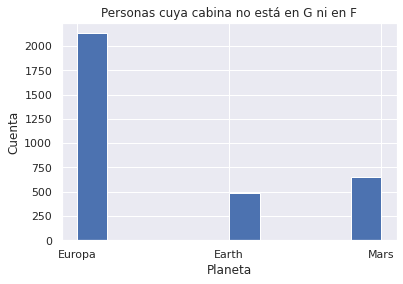

In [46]:
insight1.hist()
plt.title("Personas cuya cabina no está en G ni en F")
plt.xlabel("Planeta")
plt.ylabel("Cuenta")

En este caso es notable que los pasajeros cuya cabina no esta en G ni en F, usualmente son de Europa. Esto es significativo porque la moda de esta categoría es Earth, entonces imputar los datos con Europa sería más adecuado en teoría.

In [47]:
insight2 = df_categorical1[df_categorical1["VIP"] == True]["HomePlanet"]

Text(0, 0.5, 'Cuenta')

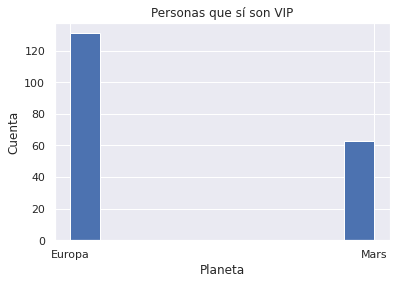

In [48]:
insight2.hist()
plt.title("Personas que sí son VIP")
plt.xlabel("Planeta")
plt.ylabel("Cuenta")

En este caso cuando los pasajeros son VIP es bastante claro que su planeta es más probable que sea Europa, y no Earth que es la moda.

In [49]:
insight3 = df_categorical1[df_categorical1["HomePlanet"] == "Europa"]["Deck"]


Text(0, 0.5, 'Cuenta')

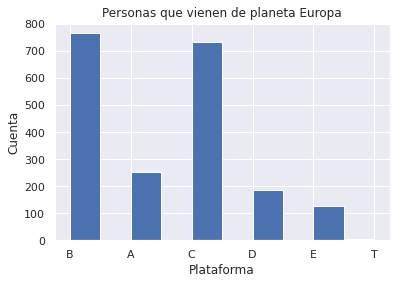

In [50]:
insight3.hist()
plt.title("Personas que vienen de planeta Europa")
plt.xlabel("Plataforma")
plt.ylabel("Cuenta")

Aquí se puede ver que cuando los pasajeros vienen de Europa, es muy común que tengan su cabina en B o en C. La moda de esta categoría es F entonces no sería lo más adecuado imputar con este valor.

In [51]:
insight4 = df_categorical1[df_categorical1["HomePlanet"] == "Earth"]["Deck"]

Text(0, 0.5, 'Cuenta')

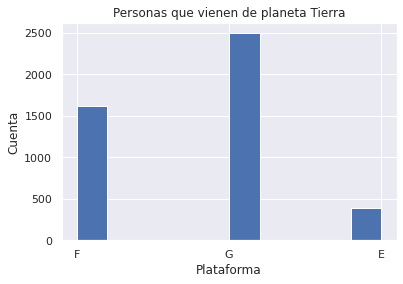

In [52]:
insight4.hist()
plt.title("Personas que vienen de planeta Tierra")
plt.xlabel("Plataforma")
plt.ylabel("Cuenta")

Aquí cuando los pasajeros vienen de Earth, es más probable que tengan su cabina en G que su cabina sea en F. 

In [53]:
insight5 = df[(df["RoomService"]==0) & 
                (df["FoodCourt"]==0) & 
                (df["Spa"]==0) & 
                (df["ShoppingMall"]==0) & 
                (df["VRDeck"]==0)]["CryoSleep"]

Text(0, 0.5, 'Cuenta')

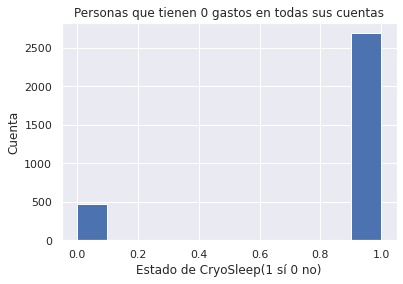

In [54]:
plt.hist(insight5.astype(float))
plt.title("Personas que tienen 0 gastos en todas sus cuentas")
plt.xlabel("Estado de CryoSleep(1 sí 0 no)")
plt.ylabel("Cuenta")

### ❗Aquí se hacen correcciones de acuerdo a las observaciones del profesor Julio.

Aquí cuando los pasajeros tienen 0 en todas sus columnas de gastos, no solamente en 1, sino en todas, es mucho más probable que estén en CryoSleep, esto es algo lógico que suceda. Esto también lleva a la conclusión que cuando están en CryoSleep, los pasajeros usualmente tienen 0 en todas sus columnas de gastos.

Text(0, 0.5, 'Cuenta')

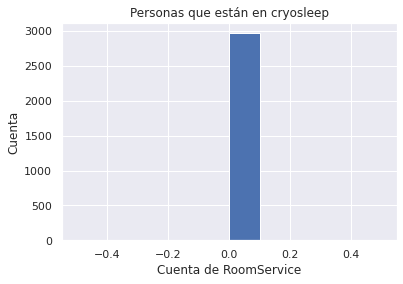

In [55]:
insight6 = df[df["CryoSleep"]==True]["RoomService"].hist()
plt.title("Personas que están en cryosleep")
plt.xlabel("Cuenta de RoomService")
plt.ylabel("Cuenta")

Text(0, 0.5, 'Cuenta')

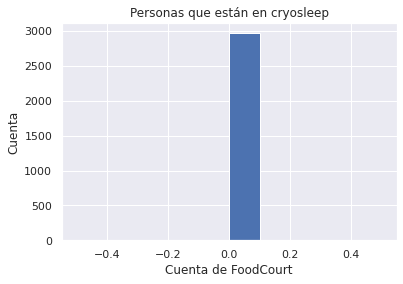

In [56]:
insight7 = df[df["CryoSleep"]==True]["FoodCourt"].hist()
plt.title("Personas que están en cryosleep")
plt.xlabel("Cuenta de FoodCourt")
plt.ylabel("Cuenta")

Text(0, 0.5, 'Cuenta')

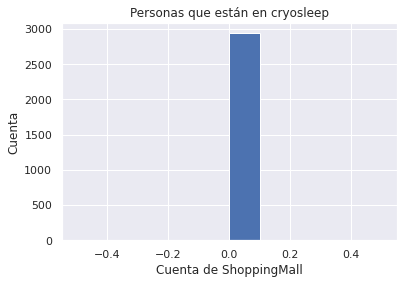

In [57]:
insight8 = df[df["CryoSleep"]==True]["ShoppingMall"].hist()
plt.title("Personas que están en cryosleep")
plt.xlabel("Cuenta de ShoppingMall")
plt.ylabel("Cuenta")

Text(0, 0.5, 'Cuenta')

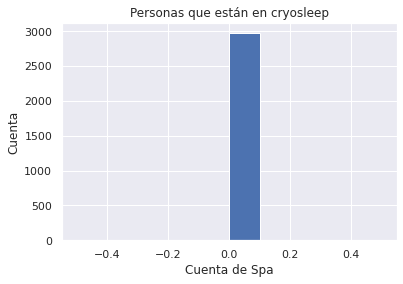

In [58]:
insight9 = dfCl[dfCl["CryoSleep"]==True]["Spa"].hist()
plt.title("Personas que están en cryosleep")
plt.xlabel("Cuenta de Spa")
plt.ylabel("Cuenta")

Text(0, 0.5, 'Cuenta')

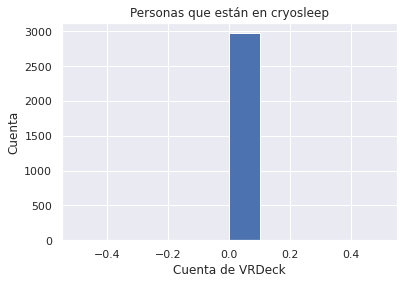

In [59]:
insight10 = dfCl[dfCl["CryoSleep"]==True]["VRDeck"].hist()
plt.title("Personas que están en cryosleep")
plt.xlabel("Cuenta de VRDeck")
plt.ylabel("Cuenta")

### ❗Aquí se hacen correcciones de acuerdo a las observaciones del profesor Julio.

Probamos dejando los outliers y eso mejoraba el modelo en la métrica de accuracy en prueba para una división de 90 10 en entrenamiento y pruebas en la regresión logística con las variaciones que probamos, entonces dejamos los outliers.

También probamos con estandarización a una variable z, con el escalamiento min max, y ninguno de los escalamientos mejoraba el modelo en la métrica de accuracy en prueba para una división de 90 10 en entrenamiento y pruebas en la regresión logística con las variaciones que probamos, entonces dejamos los valores sin escalar.

Finalmente juntamos el preprocesamiento en una función que extrae, transforma y genera el dataframe listo para ser entrenado en un modelo. Esta función la utilizamos en el proceso de selección y refinamiento del modelo.

In [60]:

def generate_processed_dataframe(path):

    # Cargar datos
    df=pd.read_csv(path)

    # Crear nuevo dataframe para limpieza
    dfCl = df.copy()


    # Datos númericos = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

    
    filler6 = dfCl[dfCl["CryoSleep"]==True]["RoomService"].fillna(0.0)
    dfCl["RoomService"].loc[filler6.index] = filler6
    
    filler7 = dfCl[dfCl["CryoSleep"]==True]["FoodCourt"].fillna(0.0)
    dfCl["FoodCourt"].loc[filler7.index] = filler7
    
    filler8 = dfCl[dfCl["CryoSleep"]==True]["ShoppingMall"].fillna(0.0)
    dfCl["ShoppingMall"].loc[filler8.index] = filler8
    
    filler9 = dfCl[dfCl["CryoSleep"]==True]["Spa"].fillna(0.0)
    dfCl["Spa"].loc[filler9.index] = filler9

    
    filler10 = dfCl[dfCl["CryoSleep"]==True]["VRDeck"].fillna(0.0)
    dfCl["VRDeck"].loc[filler10.index] = filler10

    # Separar datos numéricos
    numeric = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    dfNum = dfCl[numeric]

    # Cálculo de la media de las variables numéricas
    ageMean = dfNum['Age'].mean()
    roomServiceMean = dfNum['RoomService'].mean()
    foodCourtMean = dfNum['FoodCourt'].mean()
    shoppingMallMean = dfNum['ShoppingMall'].median()
    spaMean = dfNum['Spa'].median()
    VRDeckMean = dfNum['VRDeck'].median()

    # Imputación por sustitución de medias
    dfNum['Age'].fillna(value = ageMean, inplace = True)
    dfNum['RoomService'].fillna(value = roomServiceMean, inplace = True)
    dfNum['FoodCourt'].fillna(value = foodCourtMean, inplace = True)
    dfNum['ShoppingMall'].fillna(value = shoppingMallMean, inplace = True)
    dfNum['Spa'].fillna(value = spaMean, inplace = True)
    dfNum['VRDeck'].fillna(value = VRDeckMean, inplace = True)

    categorical_cols = ["PassengerId", "HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name"]
    df_categorical = dfCl[categorical_cols]


    df_categorical.drop(["PassengerId", "Name"], axis=1, inplace=True)


    df_categorical["Deck"] = df_categorical["Cabin"].str[0]
    
    filler1 = df_categorical[(df_categorical["Deck"] != "G") & (df_categorical["Deck"] != "F")]["HomePlanet"].fillna("Europa")
    df_categorical["HomePlanet"].loc[filler1.index] = filler1    
    
    filler2 = df_categorical[df_categorical["VIP"] == True]["HomePlanet"].fillna("Europa")
    df_categorical["HomePlanet"].loc[filler2.index] = filler2
    
    filler3 = df_categorical[df_categorical["HomePlanet"] == "Europa"]["Deck"].fillna("B")
    df_categorical["Deck"].loc[filler3.index] = filler3
    
    filler4 = df_categorical[df_categorical["HomePlanet"] == "Earth"]["Deck"].fillna("G")
    df_categorical["Deck"].loc[filler4.index] = filler4
    
    filler5 = dfCl[(dfCl["RoomService"]==0) & 
                   (dfCl["FoodCourt"]==0) & 
                   (dfCl["Spa"]==0) & 
                   (dfCl["ShoppingMall"]==0) & 
                   (dfCl["VRDeck"]==0)]["CryoSleep"].fillna(True)
    df_categorical["CryoSleep"].loc[filler5.index] = filler5


    #return df_categorical
    
    for column in df_categorical:
        df_categorical[column].fillna(df_categorical[column].mode()[0], inplace=True)
        
    # Índice del dataframe limpio sin variable nombre
    index = df_categorical.index
    print(index)

    # Unir el dataframe
    df_junto = pd.DataFrame()

    # Agregar variables en orden
    df_junto['PassengerId'] = df.loc[index]['PassengerId']
    df_junto['HomePlanet'] = df_categorical['HomePlanet'] 
    df_junto['CryoSleep'] = df_categorical['CryoSleep']
    df_junto['Cabin'] = df_categorical['Cabin']
    df_junto['Destination'] = df_categorical['Destination']
    df_junto["Deck"] = df_categorical["Deck"]

    df_junto['Age'] = dfNum['Age']
    df_junto['VIP'] = df_categorical['VIP']
    df_junto['RoomService'] = dfNum['RoomService']
    df_junto['FoodCourt'] = dfNum['FoodCourt']
    df_junto['ShoppingMall'] = dfNum['ShoppingMall']
    df_junto['Spa'] = dfNum['Spa']
    df_junto['VRDeck'] = dfNum['VRDeck']
    try:
      df_junto['Transported'] = df.loc[index]['Transported']
    except:
      pass

    clean_df = df_junto.copy()

    # Crear dummie variables de 'HomePLanet' y 'Destination' y deck
    clean_df = pd.concat([clean_df, pd.get_dummies(clean_df['HomePlanet']).rename(columns=lambda x: 'HomePlanet_' + str(x))], axis=1)
    clean_df['Destination'] = clean_df['Destination'].replace({'PSO J318.5-22': 'PSOJ318.5-22', '55 Cancri e': '55Cancrie'})
    clean_df = pd.concat([clean_df, pd.get_dummies(clean_df['Destination']).rename(columns=lambda x: 'Destination_' + str(x))], axis=1)

    clean_df = pd.concat([clean_df, pd.get_dummies(clean_df["Deck"])], axis=1)


    # Reemplazar valores categóricos True/False a numéricos 1/0
    clean_df['CryoSleep'] = clean_df['CryoSleep'].replace({True: 1, False: 0})
    clean_df['VIP'] = clean_df['VIP'].replace({True: 1, False: 0})
    try:
      clean_df['Transported'] = clean_df['Transported'].replace({True: 1, False: 0})
    except:
      pass

    clean_df = clean_df.drop(columns=['HomePlanet', 'Destination'])

    # Creación de nueva columna 'Group' según 'PassengerId'
    clean_df['Group'] = 0
    for i in index:
      clean_df['Group'].loc[i] = clean_df['PassengerId'].loc[i][:4]

    # Creación de nueva columna 'NumGroup' según 'PassengerId'
    clean_df['NumGroup'] = 0
    clean_df['NumGroup']
    for i in index:
      clean_df['NumGroup'].loc[i] = clean_df['PassengerId'].loc[i][-2:]

    clean_df = pd.concat([clean_df, pd.get_dummies(clean_df["NumGroup"])], axis=1)
    clean_df.drop("NumGroup", axis=1, inplace=True)

    # Creación de nueva columna 'Side' según 'Cabin'
    clean_df['Side'] = 0
    for i in index:
      clean_df['Side'].loc[i] = clean_df['Cabin'].loc[i][-1:]
    #clean_df['Side'] = clean_df['Side'].replace({'P': 1, 'S': 0})
    
    clean_df = pd.concat([clean_df, pd.get_dummies(clean_df["Side"])], axis=1)

    # Creación de nueva columna 'TotalBill' según 'RoomService,	FoodCourt,	ShoppingMall,	Spa,	VRDeck'
    clean_df['TotalBill'] = 0
    for i in index:
      clean_df['TotalBill'].loc[i] = clean_df['RoomService'].loc[i] + clean_df['FoodCourt'].loc[i] + clean_df['ShoppingMall'].loc[i] + clean_df['Spa'].loc[i] + clean_df['VRDeck'].loc[i]

    clean_df.drop("Side", axis=1, inplace=True)
    #for numeric_col in numeric:
    #    clean_df[numeric_col] = (clean_df[numeric_col] - clean_df[numeric_col].min()) / (clean_df[numeric_col].max() - clean_df[numeric_col].min())
    #return clean_df

    #return clean_df
    # Creación de nueva columna 'Side' según 'Cabin'
    #clean_df['Deck'] = 0
    #for i in index:
    #  clean_df['Deck'].loc[i] = clean_df['Cabin'].loc[i][-1:]
    #clean_df['Side'] = clean_df['Side'].replace({'P': 1, 'S': 0})
    clean_df["constant"] = 1

    X = np.array(clean_df[["CryoSleep", "RoomService", "Spa", "VRDeck", "VIP", "FoodCourt",
                           "C", "E", "D", "B", "T",
                           "HomePlanet_Europa",
                           "Age",
                           "TotalBill",
                           "S",
                           #"P",
                           "ShoppingMall",
                           "Destination_55Cancrie",
                           "Destination_PSOJ318.5-22",
                           "Destination_TRAPPIST-1e",
                           "A",
                           "HomePlanet_Earth",
                           "HomePlanet_Mars",
                           "01",
                           #"02",
                           #"03",
                           #"04",
                           #"05",
                           #"06",
                           #"07",
                           "08",
                           "constant"
                           ]])
    #,"B", "C", "D", "E", "F", "G", "T"]])
                      
    """"RoomService", "Spa", "Age", "FoodCourt", "CryoSleep", "VIP", "VRDeck",
                                "ShoppingMall", "HomePlanet_Earth", "HomePlanet_Europa", "HomePlanet_Mars",
                                "Destination_55Cancrie", "Destination_PSOJ318.5-22", "Destination_TRAPPIST-1e",
                                "Side", "TotalBill", "A", "B", "C", "D", "E", "F", "G"]])"""
    #y = clean_df["Transported"]


    return X, clean_df

# Selección y refinamiento de modelos

In [61]:
X, df = generate_processed_dataframe("/content/kaggledb/train.csv")

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors

RangeIndex(start=0, stop=8693, step=1)


In [75]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, df[["Transported"]], test_size = 0.2)

In [76]:
from sklearn.neural_network import MLPClassifier
nnF = MLPClassifier(hidden_layer_sizes = (80), activation = "logistic", 
                   solver = "adam", alpha = 0.0001, batch_size = "auto",
                   learning_rate = "constant", learning_rate_init = 0.001,
                   power_t = 0.5, max_iter = 500, random_state = 42, 
                   warm_start = True)
nnF.fit(xTrain, yTrain)

nnF.score(xTrain, yTrain)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7995398331895313

In [77]:
nn = MLPClassifier(hidden_layer_sizes = (256, 64, 16, 4), activation = "relu", 
                   solver = "adam", alpha = 0.0001, batch_size = "auto",
                   learning_rate = "adaptive", learning_rate_init = 0.001,
                   power_t = 0.5, max_iter = 1000, random_state = 42, 
                   warm_start = True, beta_1 = 0.75, beta_2 = 0.9999, 
                   epsilon = 1e-8, n_iter_no_change = 10)
nn.fit(xTrain, yTrain)

nn.score(xTrain, yTrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8034224906528616

In [78]:
from sklearn.ensemble import RandomForestClassifier as FrstClass
from sklearn.metrics import accuracy_score
forest = FrstClass(n_estimators = 400, criterion = 'entropy', max_depth=24, 
                  min_samples_split = 19, min_samples_leaf = 6, 
                  min_weight_fraction_leaf=0.0, max_features = 'log2',  
                  random_state=42)

forest.fit(xTrain, yTrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(criterion='entropy', max_depth=24, max_features='log2',
                       min_samples_leaf=6, min_samples_split=19,
                       n_estimators=400, random_state=42)

In [79]:
foresty = FrstClass(n_estimators = 400, criterion = 'entropy', max_depth=24, 
                  min_samples_split = 2, min_samples_leaf = 1, 
                  min_weight_fraction_leaf=0.0, max_features = 'log2',  
                  random_state=42)

foresty.fit(xTrain, yTrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(criterion='entropy', max_depth=24, max_features='log2',
                       n_estimators=400, random_state=42)

In [80]:
nn.score(xTest, yTest)

0.8016101207590569

In [81]:
nnF.score(xTest, yTest)

0.7998849913743531

In [82]:
yPred = foresty.predict(xTest)
print('Accuracy: %.5f' % accuracy_score(yTest, yPred))

Accuracy: 0.80564


In [83]:
yPred = forest.predict(xTest)
print('Accuracy: %.5f' % accuracy_score(yTest, yPred))

Accuracy: 0.81081


Las variaciones de modelos de regresión logística que lograban mejor desempeño en primera instancia eran las siguientes.

In [84]:
from sklearn.linear_model import LogisticRegression
from joblib import load, dump
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [85]:
clf1 = LogisticRegression(random_state=0, max_iter=100000,
                            solver="newton-cg", penalty="l2").fit(xTrain, yTrain)
s1 = clf1.score(xTest, yTest)        
s1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7918343875790684

In [86]:
clf2 = LogisticRegression(random_state=10, max_iter=10000,
                        solver="liblinear", penalty="l1").fit(xTrain, yTrain)
s2 = clf2.score(xTest, yTest)
s2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7918343875790684

In [87]:
clf3 = LogisticRegression(random_state=1, max_iter=10000,
                        solver="liblinear", penalty="l2").fit(xTrain, yTrain)
s3 = clf3.score(xTest, yTest)     
s3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7912593444508338

Hicimos modificaciones adicionales a los datos como el solamente seleccionar las columnas que permitieran una accuracy más alta.

In [89]:
scores = []
for i in range(25):
    X_train, X_test, y_train, y_test = train_test_split(X, df["Transported"], test_size=0.1, shuffle=True)
    clf1 = LogisticRegression(random_state=0, max_iter=100000,
                            solver="newton-cg", penalty="l2").fit(X_train, y_train)
    s1 = clf1.score(X_test, y_test)         
    clf2 = LogisticRegression(random_state=10, max_iter=10000,
                            solver="liblinear", penalty="l1").fit(X_train, y_train)
    s2 = clf2.score(X_test, y_test)

    clf3 = LogisticRegression(random_state=1, max_iter=10000,
                            solver="liblinear", penalty="l2").fit(X_train, y_train)
    s3 = clf3.score(X_test, y_test)                
    
    scores += [s1, s2, s3]
print(sum(scores) / len(scores))

0.7935325670498086


Para decidir cuál variable dejar, no solamente probaba con una división de train y test, sino que con 25 divisiones de train y test de 90 10 respectivamente, sobre todos mis mejores modelos, así si hubiera algún crecimiento claro en el promedio de todas las exactitudes, significaría que en verdad la variable tiene impacto y no solamente que el conjunto de esa ocasión se entrenaba mejor con esa variable.

La versión final de la regresión logística que dejamos, fue la siguiente. Con esta regresión logramos una accuracy en kaggle de 0.802.

In [91]:
clf2 = LogisticRegression(random_state=10, max_iter=10000,
                        solver="liblinear", penalty="l1").fit(xTrain, yTrain)
s2 = clf2.score(xTest, yTest)
s2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7918343875790684

Pensamos que para ser simplemente un modelo de regresión logística, es una exactitud moderadamente alta, y tal vez el trabajo futuro sería usar modelos más avanzados como redes neuronales profundas para tener muchos parámetros y mejorar el puntaje en kaggle lo más posible. Hacemos un análisis de la evaluación del modelo en otro notebook.